# IMPORTING THE BASIC LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# UPLOADING THE DATASET TO COLAB FOR MODEL TRAINING

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mnist_dataset.csv to mnist_dataset.csv


In [ ]:
df = pd.read_csv('mnist_dataset.csv')
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# FOR SPLITTING

In [ ]:
X =df.drop(df.columns[0], axis=1).values
y = df[df.columns[0]].values

# FOR CNN APPROCH

In [ ]:
import numpy as np

X_fixed = np.hstack([X, np.zeros((X.shape[0],1))])  # add a column of zeros
X_cnn = X_fixed.reshape(-1,28,28,1) / 255.0

In [ ]:
y_cat = to_categorical(y, num_classes=len(np.unique(y)))

# TRAIN-TEST SPLIT FOR ANN APPROCH

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

# ANN APPROCH

In [ ]:
from tensorflow.keras import models, layers

In [ ]:
model_ann = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(783,)),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(len(np.unique(y)), activation='softmax')
])

model_ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_ann.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

test_loss, test_acc = model_ann.evaluate(X_test, y_test)
print(f"ANN Test Accuracy: {test_acc*100:.2f}%")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/ops/nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


473/473 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accur

# TRAIN-TEST SPLIT FOR CNN APPORCH

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_cnn, y_cat, test_size=0.2, random_state=42)

# CNN APPROCH

In [ ]:
model_cnn = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(len(np.unique(y)), activation='softmax')
])

model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
history_cnn = model_cnn.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.1)

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/ops/nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


473/473 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/5
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/5
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/5
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/5
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


In [ ]:
test_loss, test_acc = model_cnn.evaluate(X_test, y_test)
print(f"CNN Test Accuracy: {test_acc*100:.2f}%")

263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 1.0000 - loss: 0.0000e+00
CNN Test Accuracy: 100.00%


# got 100% ACCURACY in both approches because the datsset is too small , we could have genrated images using the same dataset by DATA ARGUMENTATION.
# but it was just mini project so I didn't gone for that technique.

#PLOTING TO VISUALIZE THE MODEL LOSS , ACCURACY

In [ ]:
history_cnn.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

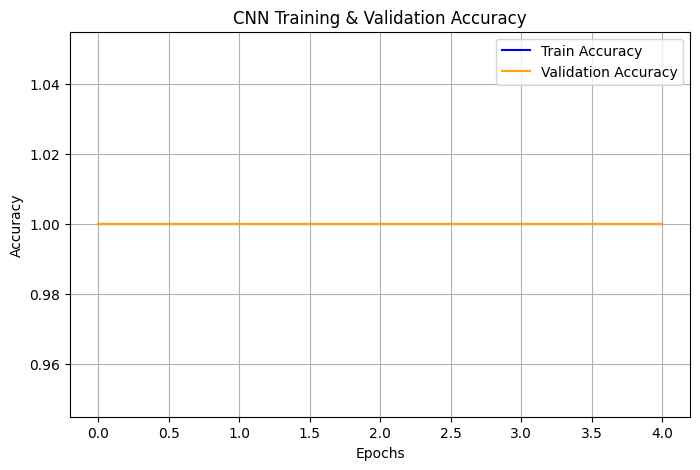

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title("CNN Training & Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

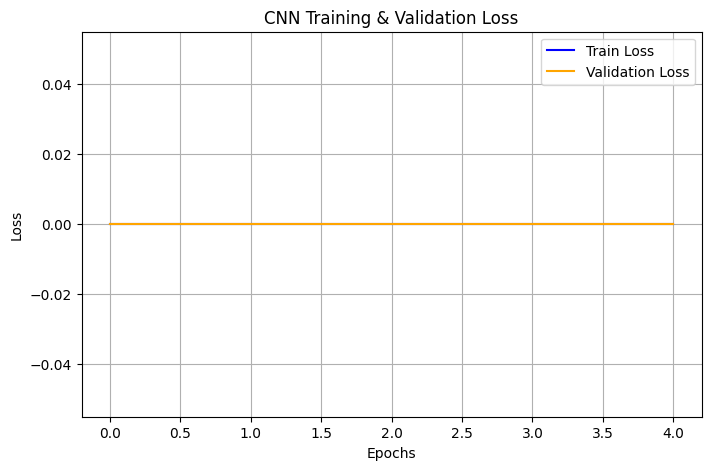

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history_cnn.history['loss'], label='Train Loss', color='blue')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss', color='orange')
plt.title("CNN Training & Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# FOR COMPARING THE ORIGINAL DATASET WRITTEN NUMBERS AND MODEL PREDICTED NUMBERS

In [ ]:
# Predict classes for test set
y_pred_probs = model_cnn.predict(X_test)           # probabilities
y_pred = y_pred_probs.argmax(axis=1)              # predicted labels
y_true = y_test.argmax(axis=1)                     # true labels

/usr/local/lib/python3.12/dist-packages/keras/src/ops/nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


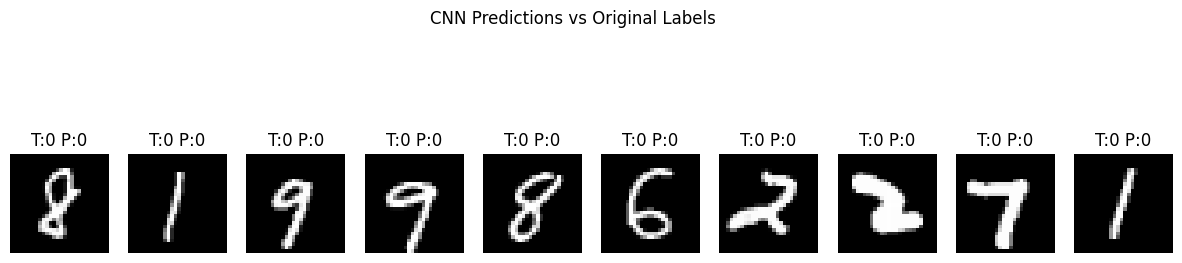

In [ ]:
import matplotlib.pyplot as plt

num_examples = 10  # number of images to display
plt.figure(figsize=(15,4))

for i in range(num_examples):
    plt.subplot(1, num_examples, i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')  # reshape for 28x28 images
    plt.title(f"T:{y_true[i]} P:{y_pred[i]}")          # True vs Predicted
    plt.axis('off')

plt.suptitle("CNN Predictions vs Original Labels")
plt.show()

# clearly , as above we got 100% accuracy , so I visualized that for better understanding purpose.